<h1>Анализ результатов опроса игроков тизера игры Готика</h1>

<p>Ссылка на результат опубликована в Steam https://steamcommunity.com/app/950670/discussions/0/1742267854809566431. Источник данных https://drive.google.com/drive/folders/1QJYZJsKn3ttbA8g5Lr-15XOHZFHEqu5S</p>
<p>Пояснение к кейсу. Всем пользователям Steam, у которых в библиотеке были игры серии Готика (Gothic, Gothic 2, Gothic 2: Night of Raven, Gothic 3), разработчкики предоставили возможность бесплатно опробовать тизер новой версии игры. По результатам предлагалось пройтии опрос, опубликованный в Google Forms</p>
<p>Описательный анализ: знакомство с датасетом</p>

<h2>Подготовка и знакомство с датасетом</h2>
<p>Загрузка пакетов</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as Counter
import statistics

Загрузка файла и просмотр размера таблицы

In [2]:
df_raw = pd.read_excel("./data/Gothic_survey/Gothic (pt) Survey (Responses)_FINAL.xlsx")
df_raw.shape

(43114, 23)

Правка настроек вывода таблицы и графиков.

In [3]:
pd.set_option('display.max_column', 23)
pd.set_option('display.max_row', 23)
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

Структура таблицы

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43114 entries, 0 to 43113
Data columns (total 23 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype         
---  ------                                                                                                                                 --------------  -----         
 0   Timestamp                                                                                                                              43114 non-null  datetime64[ns]
 1   What is your age?                                                                                                                      43113 non-null  object        
 2   What type of gamer do you consider yourself?                                                                                           43113 non-null  float64       
 3   What Gothic games have you play

Заголовок 21 столбца слишком длинный, Timestamp импортирован как текст. Начинаются правки, поэтому через копию таблицы.

In [5]:
df_wrk = df_raw.copy()

In [6]:
df_wrk.rename(columns = {"Based on what you have played in Gothic Playable Teaser: Would you want us to continue the development and release it as a full game?" : "Continue development?"}, inplace = True)
df_wrk.columns[21]

'Continue development?'

In [7]:
df_wrk['Timestamp'] = pd.to_datetime(df_wrk['Timestamp'], format='%m %d %Y %H:%M:%S')

Проверка вопросов по заголовкам столбцов и наличия пропущенных значений.

In [8]:
df_wrk.isna().sum().sort_values(ascending=False)

Please rate the user interface in the Gothic Playable Teaser     3
Which of these other games/game series have you played?          3
What do you like to see as next Gothic game?                     2
What type of gamer do you consider yourself?                     1
What Gothic games have you played?                               1
What are your favorite genres?                                   1
On which platforms do you play games?                            1
How did you play Gothic Playable Teaser?                         1
Have you finished Gothic Playable Teaser?                        1
What is your age?                                                1
What was your favorite Gothic game?                              1
Would you call yourself a diehard Gothic fan?                    1
Continue development?                                            0
What overall score would you give the Gothic Playable Teaser?    0
Please rate the English VO in the Gothic Playable Teaser      

<p>Пропущенных значений мало по сравнению с объемом данных. Пока оставлю.</p>

Предпросмотр таблицы


In [9]:
df_wrk.head()

,Timestamp,What is your age?,What type of gamer do you consider yourself?,What Gothic games have you played?,Which of these other games/game series have you played?,What are your favorite genres?,On which platforms do you play games?,How did you play Gothic Playable Teaser?,Have you finished Gothic Playable Teaser?,Please rate the visuals in the Gothic Playable Teaser,Please rate the animations in the Gothic Playable Teaser,Please rate the sound in the Gothic Playable Teaser,Please rate the music in the Gothic Playable Teaser,Please rate the controls in the Gothic Playable Teaser,Please rate the combat system in the Gothic Playable Teaser,How did you like the approach to re-interpret the plot?,What do you like to see as next Gothic game?,Would you call yourself a diehard Gothic fan?,What was your favorite Gothic game?,Please rate the English VO in the Gothic Playable Teaser,What overall score would you give the Gothic Playable Teaser?,Continue development?,Please rate the user interface in the Gothic Playable Teaser
0,2019-11-28 13:55:37.639,36-42,5.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Risen, ArcaniA, Fa...","RPG, Turn basted strategy, RTS",PC,Keyboard/Mouse,Yes,10,8,3,4,3,4,It was spot on!,Gothic Sequel,No,"Gothic, Gothic 2 (with or without Night of the...",4,85,Yes,NaN
1,2019-11-28 14:06:46.056,36-42,4.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Mount & Blade, Kin...","RPG, MMO, Action/Shooters, Strategy","PC, Consoles",Keyboard/Mouse,Yes,8,9,4,5,3,2,Didnt like it at all,Gothic Sequel,No,Gothic 3,4,80,Yes,NaN
2,2019-12-02 18:18:52.172,36-42,4.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Kingdom Come, Rise...","RPG, Action Adventure","PC, Consoles",Gamepad,Yes,9,9,4,4,4,4,It was spot on!,Gothic Remake(s),No,Gothic,4,80,Yes,NaN
3,2019-12-10 18:36:41.468,28-35,5.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Kingdom Come, ELEX...",RPG,"PC, Consoles",Keyboard/Mouse,Yes,5,4,5,5,4,5,It was spot on!,Gothic Remake(s),Yes,Gothic 2 (with or without Night of the Raven),3,80,Yes,5.0
4,2019-12-11 14:41:54.994,36-42,3.0,"Gothic, Gothic 2 (including Night of the Raven...","The Witcher, Kingdom Come, ELEX, Risen, Fallout","RPG, Action Adventure, Adventure Games","PC, Phones",Keyboard/Mouse,Yes,4,5,5,5,3,2,It was spot on!,Gothic Episodic Spin-Offs,Yes,Gothic 2 (with or without Night of the Raven),3,85,Yes,4.0


Для сравнения и нижнюю часть

In [10]:
df_wrk.tail()

,Timestamp,What is your age?,What type of gamer do you consider yourself?,What Gothic games have you played?,Which of these other games/game series have you played?,What are your favorite genres?,On which platforms do you play games?,How did you play Gothic Playable Teaser?,Have you finished Gothic Playable Teaser?,Please rate the visuals in the Gothic Playable Teaser,Please rate the animations in the Gothic Playable Teaser,Please rate the sound in the Gothic Playable Teaser,Please rate the music in the Gothic Playable Teaser,Please rate the controls in the Gothic Playable Teaser,Please rate the combat system in the Gothic Playable Teaser,How did you like the approach to re-interpret the plot?,What do you like to see as next Gothic game?,Would you call yourself a diehard Gothic fan?,What was your favorite Gothic game?,Please rate the English VO in the Gothic Playable Teaser,What overall score would you give the Gothic Playable Teaser?,Continue development?,Please rate the user interface in the Gothic Playable Teaser
43109,2020-02-16 22:26:58.674,17-21,4.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Risen, ArcaniA, Ba...","RPG, Grand Strategy",PC,Gamepad,Yes,2,3,4,3,4,4,Was ok but could be better,Gothic Prequel,Yes,Gothic 2 (with or without Night of the Raven),3,75,Yes,4.0
43110,2020-02-16 22:29:57.792,28-35,3.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Mount & Blade, Kin...","RPG, MMO",PC,Keyboard/Mouse,Yes,5,4,5,5,4,5,It was spot on!,Gothic Remake(s),Yes,Gothic 2 (with or without Night of the Raven),3,90,Yes,4.0
43111,2020-02-16 22:48:39.786,36-42,5.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Risen, Fallout","RPG, Action Adventure",PC,Gamepad,Yes,3,4,5,5,3,5,It was spot on!,Gothic Remake(s),Yes,Gothic 2 (with or without Night of the Raven),1,85,Yes,4.0
43112,2020-02-16 22:49:31.066,28-35,3.0,Gothic,The Witcher,Action Adventure,Consoles,Gamepad,Yes,4,3,4,4,4,3,Was ok but could be better,Gothic Remake(s),No,Gothic,4,80,Yes,4.0
43113,2020-02-16 22:54:03.919,17-21,4.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Kingdom Come, ELEX...",RPG,PC,Keyboard/Mouse,No,3,4,4,4,4,4,It was spot on!,Gothic Sequel,Yes,"Gothic, Gothic 2 (with or without Night of the...",4,75,Yes,5.0


На первый взгляд расхождений нет, можно начинать анализ.

<h2>Начало анализа</h2>
<p>Как собирались ответы, что за выборка по возрасту, играм, жанрам и платформам.</p>
<h3>Получение ответов</h3>
<p>Пояснений по вариантам ответов "К какому типу игроков вы себя относите?" нет ни в файле с данными, ни в прилагаемой презентации, поэтому игнорирую вопрос и перехожу к остальным вопросам.</p>


In [11]:
print(f"Первый ответ получен {df_wrk.Timestamp.min()}, последний - {df_wrk.Timestamp.max()}, на все ответы ушло примерно {(df_wrk.Timestamp.max() - df_wrk.Timestamp.min()).days} дней")

Первый ответ получен 2019-11-28 13:55:37.639000, последний - 2020-02-16 22:54:03.919000, на все ответы ушло примерно 80 дней


Динамика получения ответов

In [12]:
survey_dates = [x.date() for x in df_wrk['Timestamp']]

c:\Users\Kulikov\anaconda3\envs\base_da\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


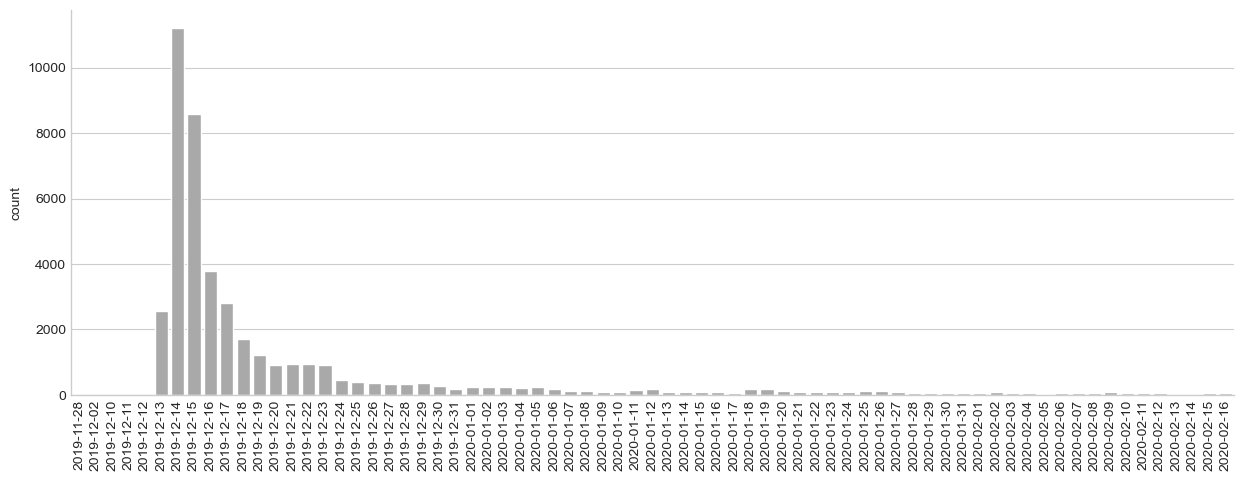

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
dates_plot = sns.countplot(x=survey_dates, color='darkgray')
dates_plot.set_xticklabels(dates_plot.get_xticklabels(), rotation = 90)
sns.despine()

Единственный пик получения ответов - с 13 по 18 декабря 2019. Дальше суточное количество ответов не превышало 1000, постепенно снижаясь (с небольшими краткими подъемами).

<h3>Возраст выборки</h3>

In [14]:
df_wrk['What is your age?'].value_counts()

What is your age?
22-27                  16847
28-35                  13611
17-21                   7971
36-42                   2384
12-16                    850
43-50                    814
50-59                    329
60+                      161
Dont want to answer      146
Name: count, dtype: int64

"Dont want to answer" и "Dec 16" мало относительно всех респондентов и они не несут значимой информации по возрасту (хотя количество ответов Dec 16 вызывает вопросы).

In [15]:
age_flt  = ['Dec 16', 'Dont want to answer', '']
age_len = len(df_wrk['What is your age?'])
age_err = len(df_wrk['What is your age?'][~df_wrk['What is your age?'].isin(age_flt)])
print(f"Применение фильтра удалит {age_len - age_err} из {age_len} ответов, т.е. {round(((age_len - age_err) / age_len) * 100, 2)}%")

Применение фильтра удалит 146 из 43114 ответов, т.е. 0.34%


In [16]:
ages = df_wrk['What is your age?'][~df_wrk['What is your age?'].isin(age_flt)].value_counts(sort=False)
ages.sort_index(ascending=True, inplace=True)
ages

What is your age?
12-16      850
17-21     7971
22-27    16847
28-35    13611
36-42     2384
43-50      814
50-59      329
60+        161
Name: count, dtype: int64

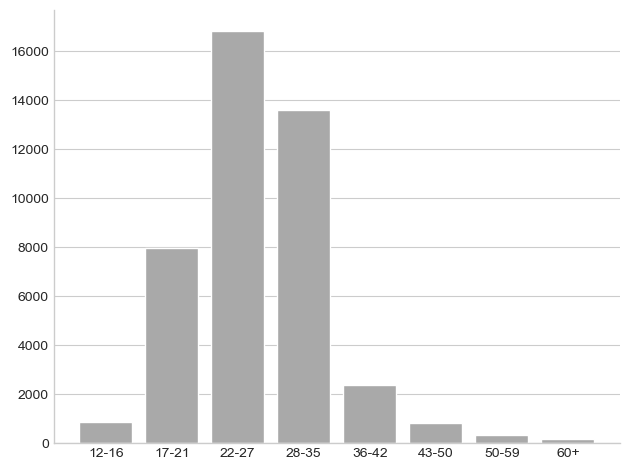

In [17]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.bar(x=ages.index, height=ages, color='darkgray')
plt.grid(axis='x')
plt.tight_layout()
sns.despine()

Самая большая возрастная группа - от 22 до 27 лет, на 2 месте - 28-35 лет, на 3 - 17-21. Остальные существенно меньше.

<h2>Игровой опыт опрошенных</h2>
<h3>Любимые жанры игр</h3>
<p>Можно ли сразу показать графиком?</p>

In [18]:
len(df_wrk['What are your favorite genres?'].unique()), df_wrk['What are your favorite genres?'].isna().sum()

(1991, 1)

Слишком много вариантов ответов для этого и 1 NA

In [19]:
# т.к. NA 1, изменю его на текстовое значение, чтобы не писать ради него исключения
df_wrk.loc[df_wrk['What are your favorite genres?'].isna(), 'What are your favorite genres?'] = '_NA'

In [20]:
genres_counter = Counter()
genres_answers = df_wrk['What are your favorite genres?']
for el in genres_answers.index:
    genres_counter.update([i.strip() for i in genres_answers[el].split(", ")])
genres_counter.most_common(10)

[('RPG', 42011),
 ('Action Adventure', 18890),
 ('Action/Shooters', 12484),
 ('MMO', 10648),
 ('Strategy', 750),
 ('RTS', 546),
 ('MOBA', 188),
 ('strategy', 123),
 ('Strategie', 79),
 ('Racing', 66)]

Существенное снижение по количеству ответов после стратегий, а вариантов написания "стратегия" 3. Исправлю для визуализации, а, т.к. результирующую таблицу буду записывать в отдельный файл, исправлю df_wrk

In [21]:
# оптимизировать
df_wrk['What are your favorite genres?'] = [el.replace('Strategie', 'Strategy') for el in df_wrk['What are your favorite genres?']]
df_wrk['What are your favorite genres?'] = [el.replace('strategy', 'Strategy') for el in df_wrk['What are your favorite genres?']]
df_wrk['What are your favorite genres?'] = [el.replace('Strategys', 'Strategy') for el in df_wrk['What are your favorite genres?']]

In [22]:
genres_counter = Counter()
genres_answers = df_wrk['What are your favorite genres?']
for el in genres_answers.index:
    genres_counter.update([i.strip() for i in genres_answers[el].split(", ")])
genres_counter.most_common(10)

[('RPG', 42011),
 ('Action Adventure', 18890),
 ('Action/Shooters', 12484),
 ('MMO', 10648),
 ('Strategy', 1009),
 ('RTS', 546),
 ('MOBA', 188),
 ('Racing', 66),
 ('Survival', 64),
 ('Simulation', 52)]

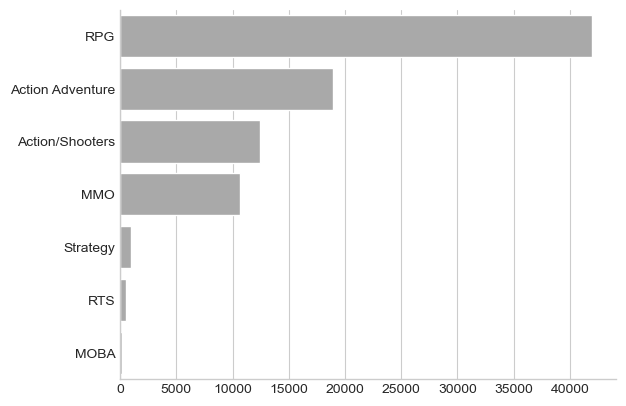

In [23]:
genres = pd.DataFrame({'genres':[key for key, value in genres_counter.most_common(7)],
                       'resps':[value for key, value in genres_counter.most_common(7)]})
fig, ax = plt.subplots()
fig = sns.barplot(genres.sort_values('resps', ascending=False), y='genres', x='resps', color='darkgray')
fig.set(ylabel='', xlabel='')
sns.despine()

<h3>Опыт в игровых сериях</h3>

In [24]:
df_wrk['Which of these other games/game series have you played?'].isna().sum(), df_wrk['Which of these other games/game series have you played?'][:11]

(3,
 0     Elder Scrolls, The Witcher, Risen, ArcaniA, Fa...
 1     Elder Scrolls, The Witcher, Mount & Blade, Kin...
 2     Elder Scrolls, The Witcher, Kingdom Come, Rise...
 3     Elder Scrolls, The Witcher, Kingdom Come, ELEX...
 4       The Witcher, Kingdom Come, ELEX, Risen, Fallout
 5     Elder Scrolls, The Witcher, Kingdom Come, ELEX...
 6     Elder Scrolls, The Witcher, Mount & Blade, Kin...
 7                            The Witcher, ELEX, ArcaniA
 8                    The Witcher, Kingdom Come, Fallout
 9     Elder Scrolls, The Witcher, Kingdom Come, ELEX...
 10                    The Witcher, ELEX, Risen, Fallout
 Name: Which of these other games/game series have you played?, dtype: object)

В ответе давалась возможность множественного выбора и есть 3 NA. Снова перед разбиением заменю NA.

In [25]:
# т.к. NA 1, изменю его на текстовое значение, чтобы не писать ради него исключения
df_wrk.loc[df_wrk['Which of these other games/game series have you played?'].isna(), 'Which of these other games/game series have you played?'] = '_NA'

In [26]:
games_counter = Counter()
games_series = df_wrk['Which of these other games/game series have you played?']
for el in games_series.index:
    games_counter.update([i.strip() for i in games_series[el].split(",")])
games_counter.most_common(10)

[('The Witcher', 38992),
 ('Elder Scrolls', 38590),
 ('Risen', 34734),
 ('Fallout', 28382),
 ('ELEX', 23946),
 ('ArcaniA', 22356),
 ('Kingdom Come', 17639),
 ('Mount & Blade', 17258),
 ('For Honor', 13178),
 ('Dark Souls', 561)]

После 'For Honor' идет сильное снижение ниже 600, поэтому для визуализации возьму только те игры, которые упомянули более 600 опрошенными.

In [27]:
games_played = pd.DataFrame({'games' : [key for key, value in games_counter.most_common(10)],
                              'resps' : [value for key, value in games_counter.most_common(10)]})

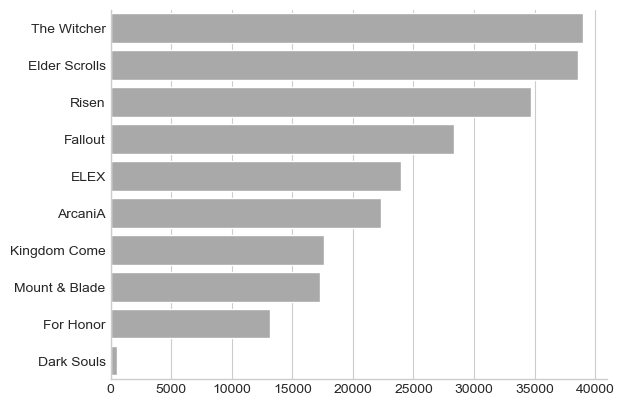

In [28]:

fig, ax = plt.subplots()
fig = sns.barplot(games_played.sort_values('resps', ascending=False), x='resps', y='games', color='darkgray')
fig.set(ylabel='', xlabel='')
sns.despine()

Самые популярные: The Witcher, Elder Scrolls, Risen, Fallout и Elex.

<h3>Предпочитаемые жанры</h3>
Нужны ли преобразования для предпочитаемых жанров?

<h3>Игровые платформы</h3>
В основном играют на платформе

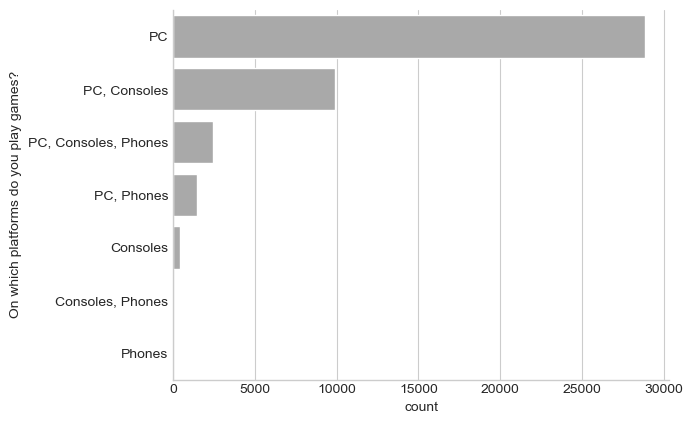

In [29]:
platforms = df_wrk['On which platforms do you play games?'].value_counts()
sns.barplot(y=platforms.index, x=platforms, color='darkgray')
sns.despine()

Основной контингент - игроки на персональных компьютерах, но т.к. опрос проводился в Steam, результат ожидаемый.

<h2>Опыт игры в серии Готика</h2>
<h3>Хардкорные фанаты</h3>

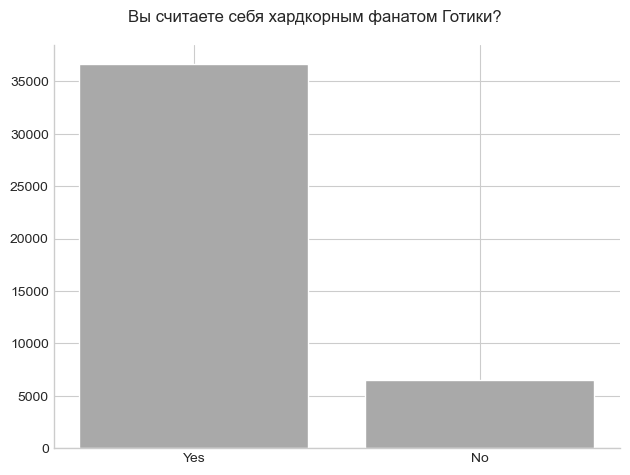

In [30]:
diehard_fan = df_wrk['Would you call yourself a diehard Gothic fan?'].value_counts()
plt.bar(diehard_fan.index, diehard_fan.values, color='darkgray')
plt.suptitle('Вы считаете себя хардкорным фанатом Готики?')
plt.tight_layout()
sns.despine()

<h3>В какие части Готики играли</h3>

In [31]:
df_wrk['What Gothic games have you played?'].isna().sum()

1

In [32]:
dt = df_wrk['What Gothic games have you played?'].dropna()
g_games = dt.value_counts()
g_games

What Gothic games have you played?
Gothic, Gothic 2 (including Night of the Raven), Gothic 3    36730
Gothic, Gothic 2 (including Night of the Raven)               2194
Gothic 2 (including Night of the Raven), Gothic 3             1192
Gothic 3                                                      1119
Gothic                                                        1013
Gothic 2 (including Night of the Raven)                        472
Gothic, Gothic 3                                               393
Name: count, dtype: int64

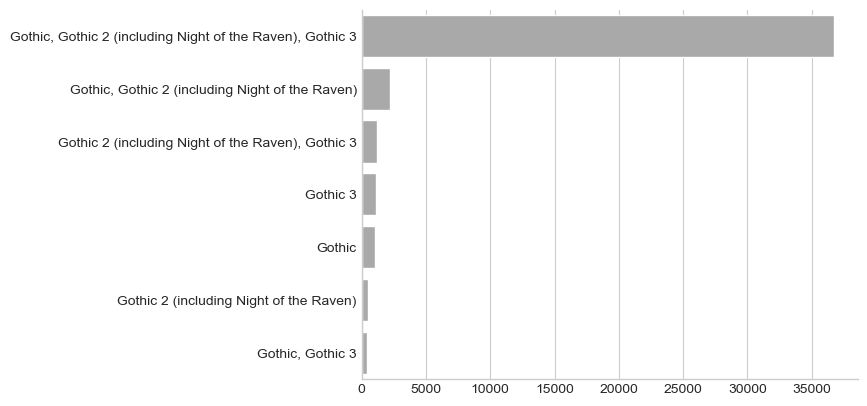

In [33]:
fig, ax = plt.subplots()
fig = sns.barplot(x=g_games, y=g_games.index, color='darkgray')
fig.set(ylabel='', xlabel='')
sns.despine()

Подавляющее большинство опрошенных играло во все 3 части. 
<h3>Любимая игра серии</h3>

In [34]:
fav_game = df_wrk['What was your favorite Gothic game?'].value_counts()
fav_game

What was your favorite Gothic game?
Gothic 2 (with or without Night of the Raven)                      18300
Gothic, Gothic 2 (with or without Night of the Raven)               9221
Gothic                                                              7622
Gothic, Gothic 2 (with or without Night of the Raven), Gothic 3     3565
Gothic 3                                                            3312
Gothic 2 (with or without Night of the Raven), Gothic 3              710
Gothic, Gothic 3                                                     383
Name: count, dtype: int64

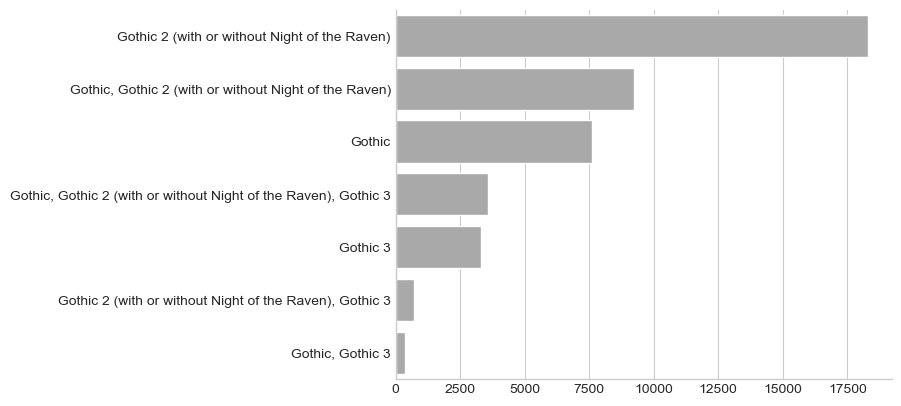

In [35]:
fig, ax = plt.subplots()
fig = sns.barplot(x=fav_game, y=fav_game.index, color='darkgray')
fig.set(ylabel='', xlabel='')
sns.despine()

Также вторая часть оказалась самой предпочитаемой как среди отдельных игр, так и их сочетаний.

<h2>Оценка опыта игры в тизер Готики</h2>

In [36]:
print(f"Тизер не прошли {round(len(df_wrk['Have you finished Gothic Playable Teaser?'][df_wrk['Have you finished Gothic Playable Teaser?'] == 'No'])/len(df_wrk.index), 2) * 100}% участвовавших в опросе.")

Тизер не прошли 16.0% участвовавших в опросе.


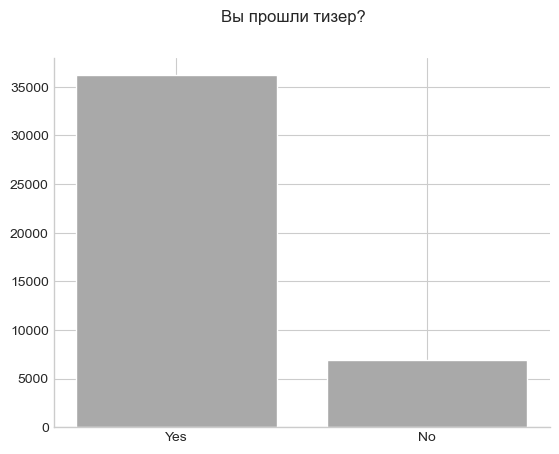

In [37]:
finished = df_wrk['Have you finished Gothic Playable Teaser?'].value_counts()
plt.bar(finished.index, finished.values, color='darkgray')
plt.suptitle('Вы прошли тизер?')
sns.despine()

<h3>Визуал</h3>

In [38]:
df_wrk['Please rate the visuals in the Gothic Playable Teaser'].value_counts(sort=False)

Please rate the visuals in the Gothic Playable Teaser
10        1
8         1
9         1
5      8966
4     19645
3     10434
2      3341
1       725
Name: count, dtype: int64

Ответы в 8-10 баллов по 1 респонденту и отсутствие ответов в 6-7 баллов выглядят подозрительно. 

In [39]:
df_wrk[df_wrk['Please rate the visuals in the Gothic Playable Teaser'] > 5]

,Timestamp,What is your age?,What type of gamer do you consider yourself?,What Gothic games have you played?,Which of these other games/game series have you played?,What are your favorite genres?,On which platforms do you play games?,How did you play Gothic Playable Teaser?,Have you finished Gothic Playable Teaser?,Please rate the visuals in the Gothic Playable Teaser,Please rate the animations in the Gothic Playable Teaser,Please rate the sound in the Gothic Playable Teaser,Please rate the music in the Gothic Playable Teaser,Please rate the controls in the Gothic Playable Teaser,Please rate the combat system in the Gothic Playable Teaser,How did you like the approach to re-interpret the plot?,What do you like to see as next Gothic game?,Would you call yourself a diehard Gothic fan?,What was your favorite Gothic game?,Please rate the English VO in the Gothic Playable Teaser,What overall score would you give the Gothic Playable Teaser?,Continue development?,Please rate the user interface in the Gothic Playable Teaser
0,2019-11-28 13:55:37.639,36-42,5.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Risen, ArcaniA, Fa...","RPG, Turn basted Strategy, RTS",PC,Keyboard/Mouse,Yes,10,8,3,4,3,4,It was spot on!,Gothic Sequel,No,"Gothic, Gothic 2 (with or without Night of the...",4,85,Yes,NaN
1,2019-11-28 14:06:46.056,36-42,4.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Mount & Blade, Kin...","RPG, MMO, Action/Shooters, Strategy","PC, Consoles",Keyboard/Mouse,Yes,8,9,4,5,3,2,Didnt like it at all,Gothic Sequel,No,Gothic 3,4,80,Yes,NaN
2,2019-12-02 18:18:52.172,36-42,4.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Kingdom Come, Rise...","RPG, Action Adventure","PC, Consoles",Gamepad,Yes,9,9,4,4,4,4,It was spot on!,Gothic Remake(s),No,Gothic,4,80,Yes,NaN


<p>Схожая картина по вопросу оценки анимации</p>

In [40]:
df_wrk['Please rate the animations in the Gothic Playable Teaser'].value_counts(sort=False)

Please rate the animations in the Gothic Playable Teaser
8        1
9        2
4    16164
5     4813
3    15200
2     5949
1      985
Name: count, dtype: int64

<p>Аномальные ответы ответы идут первыми 3 строками таблицы, заполненной от даты начала сбора данных. Предположу, что сначала использовалась 10-балльная шкала, а потом ее изменили на 5-балльную, но ответы остались.</p>
<p>Следуя предположению, исключаю ответы первых 3 людей по первым 2 вопросам на оценку</p>

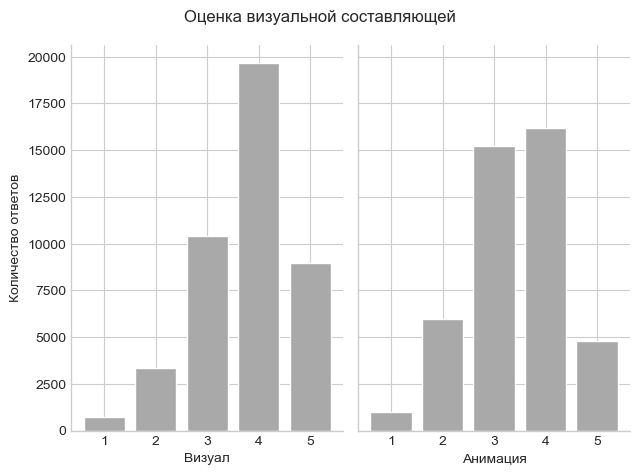

In [41]:
visual = df_wrk['Please rate the visuals in the Gothic Playable Teaser'][3:].value_counts()
animation = df_wrk['Please rate the animations in the Gothic Playable Teaser'][3:].value_counts()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.suptitle('Оценка визуальной составляющей')
ax1.bar(x=visual.index, height=visual.values, color='darkgray')
ax1.set_ylabel('Количество ответов')
ax1.set_xlabel('Визуал')
ax2.bar(x=animation.index, height=animation.values, color='darkgray')
ax2.set_xlabel('Анимация')
f.set_figwidth(6.5)
plt.tight_layout()
sns.despine()

In [42]:
print(f"Средняя оценка визуала {round(df_wrk['Please rate the visuals in the Gothic Playable Teaser'][3:].mean(), 2)},\nанимации - {round(df_wrk['Please rate the animations in the Gothic Playable Teaser'][3:].mean(), 2)}")

Средняя оценка визуала 3.76,
анимации - 3.41


Анимация оценена ниже визуальной составляющей.

<h3>Аудио</h3>

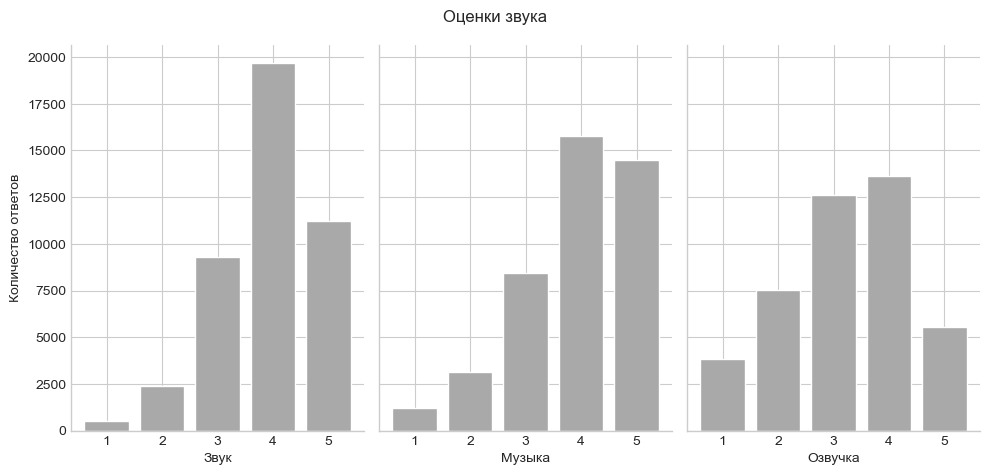

In [43]:
sound = df_wrk['Please rate the sound in the Gothic Playable Teaser'].value_counts()
music = df_wrk['Please rate the music in the Gothic Playable Teaser'].value_counts()
vas = df_wrk['Please rate the English VO in the Gothic Playable Teaser'].value_counts()
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.suptitle('Оценки звука')
ax1.bar(x=sound.index, height=sound.values, color='darkgray')
ax1.set_ylabel('Количество ответов')
ax1.set_xlabel('Звук')
ax2.bar(x=music.index, height=music.values, color='darkgray')
ax2.set_xlabel('Музыка')
ax3.bar(x=vas.index, height=vas.values, color='darkgray')
ax3.set_xlabel('Озвучка')
f.set_figwidth(10)
plt.tight_layout()
sns.despine()

Ниже оценки у озвучки, звук и музыка понравились больше.

<h3>Интерфейс</h3>

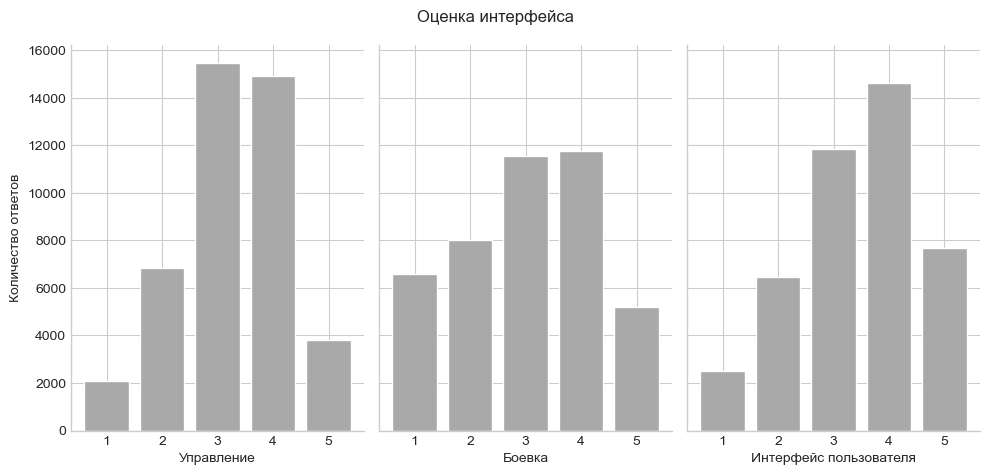

In [44]:
controls = df_wrk['Please rate the controls in the Gothic Playable Teaser'].value_counts()
combat_system = df_wrk['Please rate the combat system in the Gothic Playable Teaser'].value_counts()
ui = df_wrk['Please rate the user interface in the Gothic Playable Teaser'].value_counts()
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.suptitle('Оценка интерфейса')
ax1.bar(x=controls.index, height=controls.values, color='darkgray')
ax1.set_xlabel('Управление')
ax1.set_ylabel('Количество ответов')
ax2.bar(x=combat_system.index, height=combat_system.values, color='darkgray')
ax2.set_xlabel('Боевка')
ax3.bar(x=ui.index, height=ui.values, color='darkgray')
ax3.set_xlabel('Интерфейс пользователя')
f.set_figwidth(10)
plt.tight_layout()
sns.despine()

Управление в бою - первый по-настоящему "проблемный" момент по сравнению со всеми остальными вопросами, но около 8 т. опрошенных не довольны управлением и интерфейсом.

In [45]:
print(f"Средние рейтинги по вопросам:\nУправление - {round(df_wrk['Please rate the controls in the Gothic Playable Teaser'].mean(), 2)},\nБоевка - {round(df_wrk['Please rate the combat system in the Gothic Playable Teaser'].mean(),2)},\nUI - {round(df_wrk['Please rate the user interface in the Gothic Playable Teaser'].mean(),2)}")

Средние рейтинги по вопросам:
Управление - 3.27,
Боевка - 3.02,
UI - 3.43


<h3>Общая оценка тизера</h3>

In [46]:
score_counter = Counter(df_wrk['What overall score would you give the Gothic Playable Teaser?'])
score_counter

Counter({80: 6774,
         75: 6626,
         70: 5544,
         85: 5255,
         60: 4407,
         '90+': 3399,
         90: 2869,
         50: 2359,
         40: 1588,
         'Below 30': 674,
         30: 599,
         '60, 70': 463,
         '75, 80': 436,
         '80, 85': 403,
         '70, 75': 340,
         '85, 90': 292,
         '50, 60': 230,
         '90, 90+': 111,
         '40, 50': 99,
         '70, 75, 80': 83,
         '75, 80, 85': 73,
         '30, 40': 58,
         '80, 85, 90': 48,
         '60, 70, 75': 47,
         '85, 90, 90+': 32,
         '50, 60, 70': 28,
         '70, 80': 19,
         '40, 50, 60': 18,
         '75, 85': 17,
         'Below 30, 30': 16,
         '60, 75': 16,
         '80, 85, 90, 90+': 12,
         'Below 30, 30, 40': 11,
         '75, 80, 85, 90': 9,
         '70, 75, 80, 85': 9,
         '80, 90': 9,
         'Below 30, 30, 40, 50, 60, 70, 75, 80, 85, 90, 90+': 8,
         '85, 90+': 8,
         '30, 40, 50': 6,
         '40, 60':

<p>Похоже, что не настроили ограничения ответа - много "грязных" ответов. Вижу 3 варианта работы:</p>
<ul><li>удалить все значения длиной больше 2 символов</li>
<li>заменить 0+ на 5 и повторить удаление всего больше 2 символо</li>
<li>заменить below n на n-1, по ответам с несколькими числовыми значениями рассчитать медиану.</li></ul>
<p>Чтобы дальше сравнить все 3 варианта между собой и выбрать наиболее подходящий, сохраню как 3 разных объекта</p>


In [47]:
scores = df_wrk['What overall score would you give the Gothic Playable Teaser?']
print(f"Ответов, в которых больше 2 элементов: {sum(len(i) > 2 for i in scores)}\nИзбавиться от них - удалить {round((sum(len(i) > 2 for i in scores)/len(df_wrk))*100, 2)}% из {len(scores)}.")

TypeError: object of type 'int' has no len()

In [ ]:
scores0 = [int(i) for i in scores if len(i) < 3]
scores0_descr = pd.Series(scores0).describe().round(3)
scores0_descr

count    36021.000
mean        72.061
std         13.732
min         30.000
25%         70.000
50%         75.000
75%         80.000
max         90.000
dtype: float64

In [ ]:
scores1 = scores.str.replace('0\+', '1')
print(f"Ответов, в которых осталось больше 2 элементов: {sum(len(i) > 2 for i in scores1)}\nИзбавиться от них - удалить {round((sum(len(i) > 2 for i in scores1)/len(df_wrk))*100, 2)}% от {len(scores1)}.")

Ответов, в которых осталось больше 2 элементов: 7093
Избавиться от них - удалить 16.45% от 43114.


In [ ]:
scores1 = [int(i) for i in scores1 if len(i) < 3]
scores1_descr = pd.Series(scores1).describe().round(3)
scores1_descr

count    36021.000
mean        72.061
std         13.732
min         30.000
25%         70.000
50%         75.000
75%         80.000
max         90.000
dtype: float64

Что можно сделать дальше: заменю 'Below n' на n-1 ('Below 30' -> 25)

In [ ]:
for i in scores[scores.str.match('Below')].unique():
    print(i)

Below 30
Below 30, 30, 40
Below 30, 30, 90+
Below 30, 30
Below 30, 70
Below 30, 30, 40, 50, 60, 70, 75, 80, 85, 90, 90+
Below 30, 85, 90+
Below 30, 30, 40, 50
Below 30, 75
Below 30, 40
Below 30, 85
Below 30, 90+
Below 30, 60
Below 30, 60, 70
Below 30, 50
Below 30, 80
Below 30, 30, 50
Below 30, 40, 50
Below 30, 30, 40, 50, 60, 70, 75, 80, 85
Below 30, 30, 40, 50, 60, 70
Below 30, 30, 40, 50, 60, 70, 75, 80, 85, 90


Паттерн один и без отклонений, поэтому использую простой вариант. Ответ '???? 30' встречается 1 раз и похож на 'Below 30', но за отсутствием подтверждения заменю на 50.

In [ ]:
scores_tmp = scores.copy()
scores_tmp = scores_tmp.str.replace('???? 30', '50').str.replace('0+', '5').str.replace('Below 30', '25')

In [ ]:
scores_tmp.unique()

array(['85', '80', '70', '75', '30', '90, 95', '90', '95', '60', '50',
       '85, 90', '80, 85', '25', '80, 85, 90, 95', '30, 40', '40',
       '60, 70', '50, 60', '70, 75', '80, 85, 90', '75, 80', '40, 50',
       '70, 80', '25, 30, 40', '60, 80', '25, 30, 95', '85, 90, 95',
       '40, 50, 60', '25, 30', '75, 80, 85', '25, 70', '50, 60, 70',
       '70, 85', '70, 75, 80',
       '25, 30, 40, 50, 60, 70, 75, 80, 85, 90, 95', '40, 70, 80',
       '40, 50, 60, 70', '25, 85, 95', '30, 40, 50', '75, 80, 85, 90',
       '70, 75, 80, 85', '60, 70, 75', '25, 30, 40, 50', '25, 75',
       '50, 70', '30, 85', '60, 75', '80, 90', '30, 90', '80, 95',
       '30, 40, 50, 60', '85, 95', '25, 40', '25, 85', '25, 95', '75, 85',
       '50, 60, 70, 75, 80', '60, 70, 75, 80, 85', '40, 60',
       '60, 70, 75, 80', '50, 85', '50, 80', '50, 75', '25, 60',
       '70, 80, 95', '40, 50, 60, 85', '25, 60, 70', '25, 50',
       '50, 60, 70, 75', '30, 50', '30, 80', '50, 95', '25, 80',
       '60, 75, 80', 

In [ ]:
scores2 = []
for el in scores_tmp:
    if len(el) < 3:
        scores2.append(str(el))
    else:
        el_split = el.split(', ')
        to_append = statistics.median([int(num) for num in el_split])
        scores2.append(to_append)
            
len(scores2)  

43114

In [ ]:
scores2 = [float(i) for i in scores2]
scores2_descr = pd.Series(scores2).describe().round(3)
scores2_descr

count    43114.000
mean        73.154
std         15.664
min         25.000
25%         70.000
50%         75.000
75%         85.000
max         95.000
dtype: float64

Таблица описательных статистик по 3 вариантам данных общей оценки тизера

In [ ]:

scores_table = pd.DataFrame({'scores0': scores0_descr.values,
                             'scores1': scores1_descr.values,
                             'scores2': scores2_descr.values}, 
                             index=scores0_descr.index)
scores_table

,scores0,scores1,scores2
count,36021.000,36021.000,43114.000
mean,72.061,72.061,73.154
std,13.732,13.732,15.664
min,30.000,30.000,25.000
25%,70.000,70.000,70.000
50%,75.000,75.000,75.000
75%,80.000,80.000,85.000
max,90.000,90.000,95.000


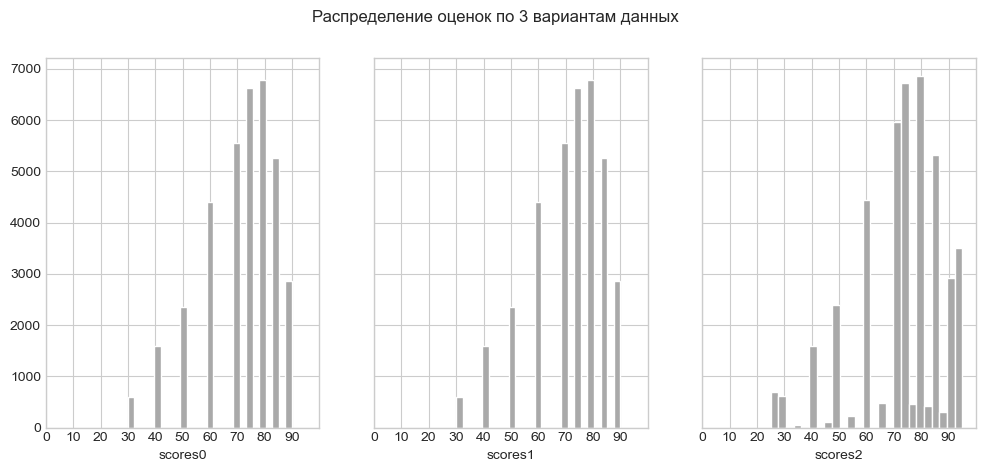

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.suptitle('Распределение оценок по 3 вариантам данных')
ax1.hist(x=scores0, bins=25,  color='darkgray')
ax1.set(xlim=(0, 100), xticks=np.arange(0, 100, 10))
ax1.set_xlabel('scores0')
ax2.hist(x=scores1, bins=25,  color='darkgray')
ax2.set(xlim=(0, 100), xticks=np.arange(0, 100, 10))
ax2.set_xlabel('scores1')
ax3.hist(x=scores2, bins=25,  color='darkgray')
ax3.set(xlim=(0, 100), xticks=np.arange(0, 100, 10))
ax3.set_xlabel('scores2')
f.set_figwidth(12)

Все 3 варианта показывают схожее распределение, поэтому для анализа выберу 3 вариант с наибольшим объемом данных. Однако, в глаза бросается отсутствие значений меньше 30 для не преобразованных данных. Задавать минимальную оценку игры в 30 баллов из 100 сомнительно.

<h3>Мнения</h3>

Продолжать ли разработку после тизера?

In [ ]:
df_wrk['Continue development?'].value_counts()

Continue development?
Yes    40891
No      2223
Name: count, dtype: int64

Какой тип игры предпочтут опрошенные?

In [ ]:
len(df_wrk['What do you like to see as next Gothic game?'].unique())

3778

In [ ]:
df_wrk['What do you like to see as next Gothic game?'].value_counts()

What do you like to see as next Gothic game?
Gothic Remake(s)                                                                                                    26012
Gothic Sequel                                                                                                        7573
Gothic Prequel                                                                                                       4989
All of the above                                                                                                       66
all of the above                                                                                                       48
                                                                                                                    ...  
Gothic Remake (s) are fine but i hope if they come there will be a Prequel as well after that.                          1
ALL =)))                                                                                             

Насколько понравилось переосмысление игры?

In [ ]:
df_wrk['How did you like the approach to re-interpret the plot?'].value_counts()

How did you like the approach to re-interpret the plot?
Was ok but could be better    25344
It was spot on!               12571
Didnt like it at all           5199
Name: count, dtype: int64